<a href="https://colab.research.google.com/github/Mhoover41/Stroke-Prediction/blob/main/Stroke_Prediction_Project_2_Melissa_Hoover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stroke Prediction**


- **Author:** Melissa Hoover

#**Project Overview**

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Data Source:  https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Data Link: [healthcare-dataset-stroke-data.csv](https://github.com/Mhoover41/Stroke-Prediction/files/11501796/healthcare-dataset-stroke-data.csv)

##Data Dictionary

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

**Note:** "Unknown" in smoking_status means that the information is unavailable for this patient

#**Load and Inspect Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### **Imports**

In [2]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt
#Seaborn
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Classification Metrics

from sklearn.metrics import (ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay,  
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

##### **Loading Data**

In [3]:
#Load the data file
filename= '/content/drive/MyDrive/Project 2/healthcare-dataset-stroke-data.csv'
df= pd.read_csv(filename)

**Inspecting Data**

In [4]:
# Display the first 5 rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


  How many Rows/Columns:

In [5]:
# Display the number of rows and columns
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 5110 rows, and 12 columns
The rows represent 5110 observations, and the columns represent 11 features and 1 target variable.


##### **Display Column Names, Count of Non-Null Values, and Data Types**

In [6]:
# Display index, columns, null count, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#**Clean Data**

   

Checking the data types:

In [7]:
# Display data types
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

- The dataset has a combination of categorical (object) and numeric (float and int) data types.
- No mismatched data types were found.

Identifying missing values:

In [8]:
#Display total number of missing values
missing_values= df.isna().sum().sum()
print(f"Total number of missing values is {missing_values}")

Total number of missing values is 201


In [9]:
# Display the count of missing values for each column
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
# Display the percentage of missing values for each column
df.isna().sum()/len(df) * 100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

There are 3.9% missing values in bmi column.  This will be imputed with SimpleImputer in our preprocessing steps. 

Checking for Duplicates:

In [11]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


Drop Unnecessary Columns:

In [12]:
#Drop column
df.drop(columns = ['id'], inplace=True)

In [13]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

- I have confirmed the 'id' column is now dropped.

##Numerical Columns
- Check for inconsistencies in all columns that are Integer or Float data types
- Check for unusual or impossible values.
- Check for Outliers

In [14]:
#View summary statistics
df.describe(include='number')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- The only unusual values I see are for the age.  An age of .08 doesn't make sense.  Lets investigate further.   

### Age Column

In [15]:
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

- There are some floats we need to convert to whole numbers. 

In [16]:
df['age'] = df['age'].round(0)

In [17]:
df['age'].value_counts()

78.0    102
57.0     95
2.0      90
52.0     90
54.0     87
       ... 
10.0     35
4.0      34
7.0      32
6.0      24
0.0      20
Name: age, Length: 83, dtype: int64

I can see we now have 20 ages that are 0, lets round those up to 1. 

In [18]:
df['age'] = df['age'].replace(0, 1)

In [19]:
df['age'].value_counts()

78.0    102
57.0     95
2.0      90
52.0     90
54.0     87
       ... 
11.0     36
10.0     35
4.0      34
7.0      32
6.0      24
Name: age, Length: 82, dtype: int64

In [20]:
df['age'].describe()

count    5110.000000
mean       43.230528
std        22.605333
min         1.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

- We now have a minimum age of 1 and a maximum age of 82

### Hypertension Column

In [21]:
df['hypertension'].unique()

array([0, 1])

### Heart Disease Column

In [22]:
df['heart_disease'].unique()

array([1, 0])

### Average Glucose Level Column

In [23]:
df['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

### BMI Column

In [24]:
df['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

- There may be some outliers here lets look at a box plot to see where they are later on

### Stroke Column

In [25]:
df['stroke'].unique()

array([1, 0])

## Categorical Columns
- Check for inconsistencies in all columns that are object data types


In [26]:
#View Summary Statistics for Object data types
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [27]:
from scipy.sparse import data
# Create a series of the datatypes
data_types = df.dtypes
# Create a filter to select only the object datatypes
object_data_types = data_types[(data_types == 'object')]
# Display the series of object datatypes
object_data_types

gender            object
ever_married      object
work_type         object
Residence_type    object
smoking_status    object
dtype: object

In [28]:
## Display the index of object datatypes
object_data_types.index

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [29]:
## Loop through the object datatype columns
for column in object_data_types.index:
    ## Print the column name
    print(column)
    ## Print the unique values from the column
    print(df[column].unique())
    ## Print a blank row
    print('\n')

gender
['Male' 'Female' 'Other']


ever_married
['Yes' 'No']


work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


Residence_type
['Urban' 'Rural']


smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']




- No inconsistencies noted

# **Exploratory Data Analysis**

### Functions

#### Function to Display Histogram

In [30]:
# Create a function to create a Histogram
def hist_plot(column_name, bin_count):
    fig, ax = plt.subplots(nrows=1, figsize=(8,4), facecolor='w')
    plt.title(column_name, fontsize = 22, weight='bold')
    sns.histplot(data=df, x=column_name, color='#069AF3', 
                 linewidth=2, bins=bin_count); 
    plt.xlabel(column_name, fontsize = 16, weight='bold')
    plt.xticks(weight='bold')
    ax.set_ylabel('Instances',fontweight='bold',fontsize=14)
    ax.set_facecolor('lightblue')
    ax.tick_params(labelcolor='k', labelsize=10)
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))

    #ax.set_yticklabels(ax.get_yticks(), weight='bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)

#### Function to Display Histogram and Boxplot

In [31]:
# Create a function to create a Histogram and Boxplot in the same figure
def hist_box_plot(column_name, bin_count):
    fig, (ax1,ax2) = plt.subplots(nrows =2, sharex=True, figsize=(8, 6), 
                                  facecolor='w', 
                                  gridspec_kw={'height_ratios':[0.75, 0.25]})
    plt.suptitle(f'{column_name}', y=1.02, va='center', 
                 fontsize = 22, weight='bold')
    sns.histplot(data=df, x=column_name, color='#069AF3', linewidth=2, 
                 ax=ax1, bins=bin_count);
    plt.xlabel(column_name, fontsize = 16, weight='bold')
    plt.xticks(weight='bold')
    ax1.set_ylabel('Instances',fontweight='bold',fontsize=18)
    ax1.set_facecolor('lightblue')
    ax1.tick_params(labelcolor='k', labelsize=10)
    ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    #ax1.set_yticklabels(ax1.get_yticks(), weight='bold')
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(3)
    sns.boxplot(data=df, x=column_name, width=.5, color='#069AF3', ax=ax2,
                medianprops={'color':'k', 'linewidth':2},
                whiskerprops={'color':'k', 'linewidth':2},
                boxprops={'facecolor':'#069AF3', 
                          'edgecolor':'k', 'linewidth':2},
                capprops={'color':'k', 'linewidth':3}); 
    ax2.tick_params(labelcolor='k', labelsize=10)
    ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    #ax2.set_xticklabels(ax2.get_xticks(), fontweight='bold')
    ax2.spines['bottom'].set_linewidth(2)
    ax2.spines['top'].set_color(None)
    ax2.spines['left'].set_color(None)
    ax2.spines['right'].set_color(None)
    plt.tight_layout();
    plt.show;

#### Function to Display Countplot

In [32]:
# Create a function to create a Count Plot
def count_plot(column_name, label_order):
    fig, ax = plt.subplots(nrows=1, figsize=(8,4), facecolor='w')
    plt.title(column_name, fontsize = 22, weight='bold')
    sns.countplot(data=df, x=column_name, lw=3, ec='k', 
                  color='#069AF3', order=label_order)
    plt.xlabel('')
    plt.xticks(weight='bold')
    ax.set_ylabel('Instances', fontweight='bold', fontsize=18)
    ax.set_facecolor('lightblue')
    ax.tick_params(labelcolor='k', labelsize=12)
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    #ax.set_yticklabels(ax.get_yticks(), weight='bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
    plt.tight_layout()
    plt.show;

####Function to Display Scatter Plot

In [33]:
# Create a function to create a Count Plot
# Sex and Age correlation to Stroke
def scatter_plot(x,y):
    palette_dict = {0: 'indigo' , 1: 'magenta'}
    fig, ax = plt.subplots(figsize=(8,4), facecolor='w')
    sns.scatterplot(x=x, y=y, hue="stroke", 
                    palette=palette_dict, data=df);
    plt.title(f'{x} and {y} \ncorrelation to Stroke', fontsize = 18, weight='bold')
    plt.xlabel(f'{x}', fontsize = 14, weight='bold')
    plt.ylabel(f'{y}', fontsize = 14, weight='bold');
    plt.xticks(fontsize = 10, weight='bold')
    plt.yticks(fontsize = 10, weight='bold');
    ax.set_facecolor('lightblue')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
    plt.legend(bbox_to_anchor=(1.23, 1))
    plt.tight_layout()
    plt.show;

##Numerical Columns



- For each numeric column, we will visualize the distribution with a histogram and a boxplot.

### Summary Statistics

In [34]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.230528,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.605333,0.296607,0.226063,45.283560,7.854067,0.215320
min,1.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Age Column

In [35]:
#Display the descriptive statistics for the column
df['age'].describe()

count    5110.000000
mean       43.230528
std        22.605333
min         1.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

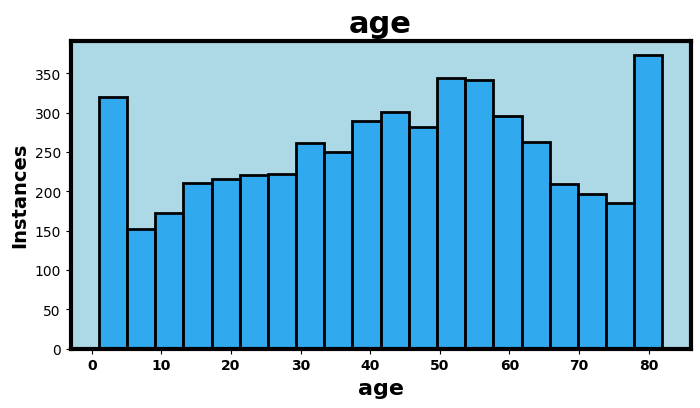

In [36]:
# Utilize function to display histogram plot
hist_plot('age', 20);

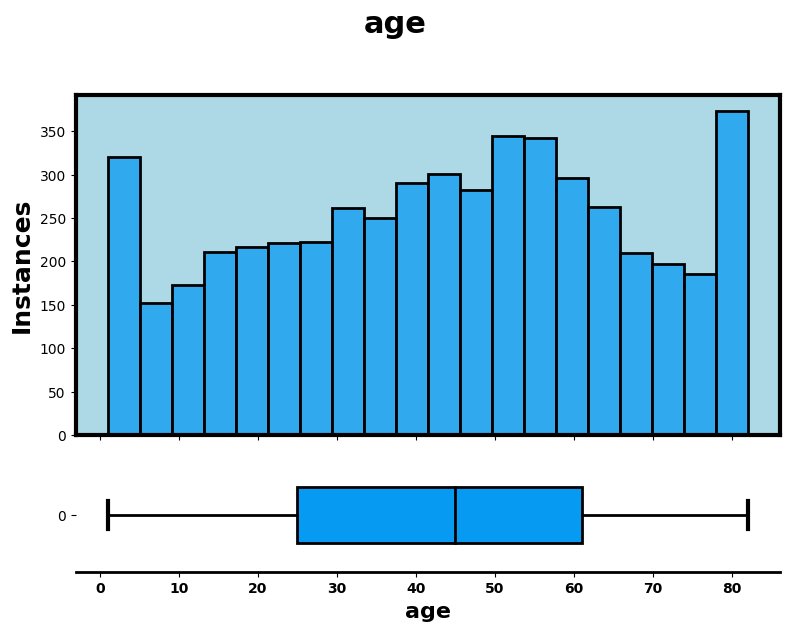

In [37]:
# Utilize function to display histogram and boxplot
hist_box_plot('age',20)

- There are no outliers and the median Age is 45.

### Average Glucose Level

In [38]:
#Display the descriptive statistics for the column
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

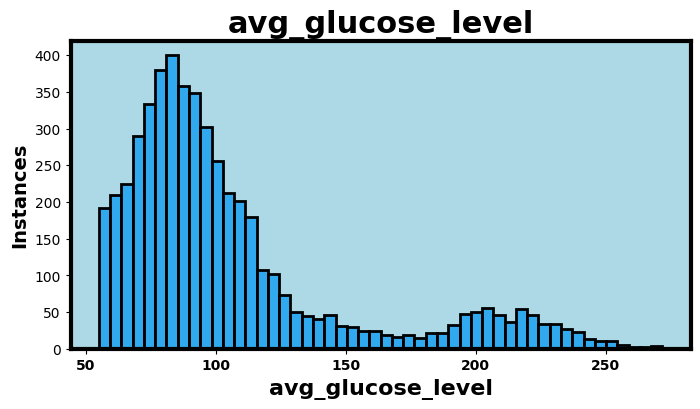

In [39]:
# Utilize function to display histogram plot
hist_plot('avg_glucose_level', 50);

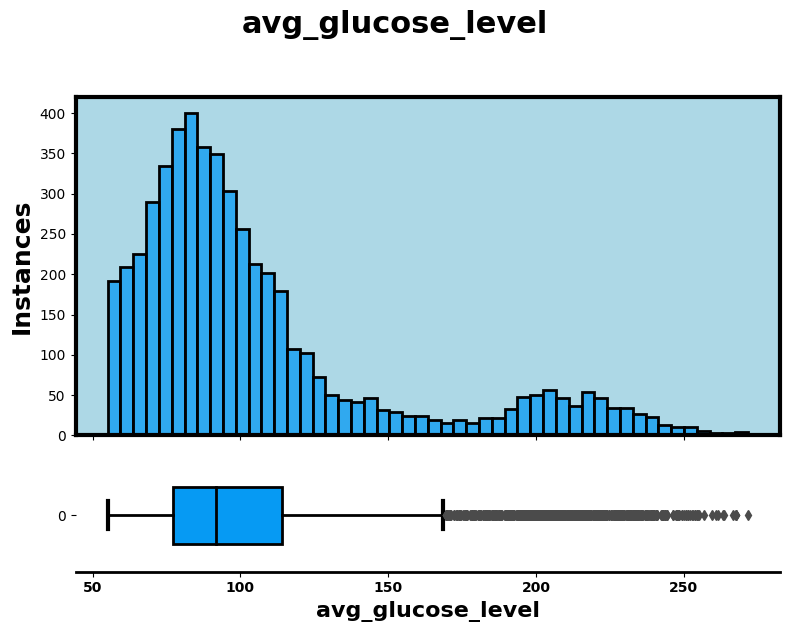

In [40]:
# Use Function to display Histogram and Boxplot
hist_box_plot('avg_glucose_level', 50);

- This is right skewed.  The maximum average glucose level is 271.  The mean is 106 and median is 92.  There are several outliers on the high side.  

- Lets filter out the outliers.

In [41]:
#mean = np.mean(df["avg_glucose_level"]) # calculate the mean
#std = np.std(df["avg_glucose_level"]) # calculate the standard deviation
#std

In [42]:
#threshold =0.8 # set the threshold
#z_score = (df['avg_glucose_level'] - mean) / std # calculate the z-score
#condition = np.abs(z_score) < threshold # create a boolean condition
#df.loc[condition, 'avg_glucose_level'] = np.nan # update the column with NaN values for outliers
#df.dropna(inplace=True) # drop rows with NaN values in place

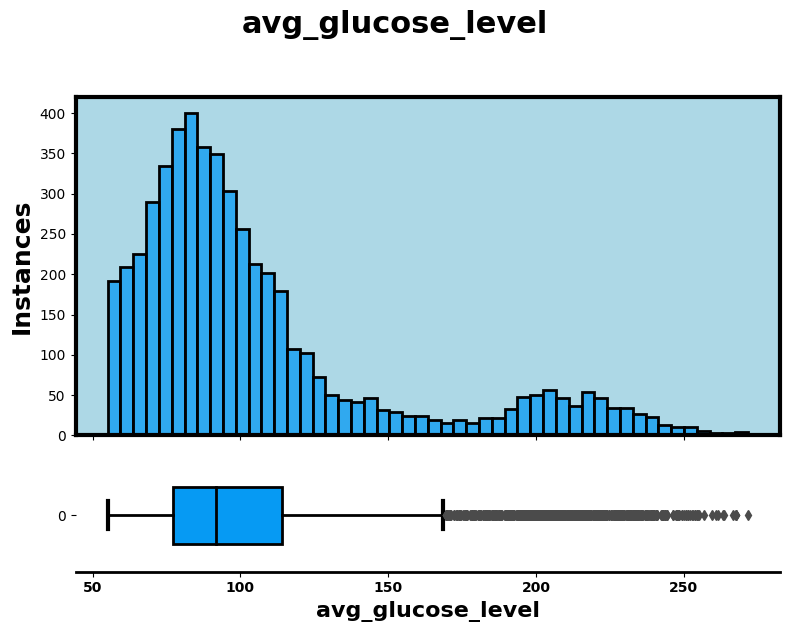

In [43]:
# Use Function to display Histogram and Boxplot
hist_box_plot('avg_glucose_level', 50);

In [44]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

- Outliers are now removed, median is 69 and mean is 130.

### BMI Column

In [45]:
#Displaty Summary Statistics for the column
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

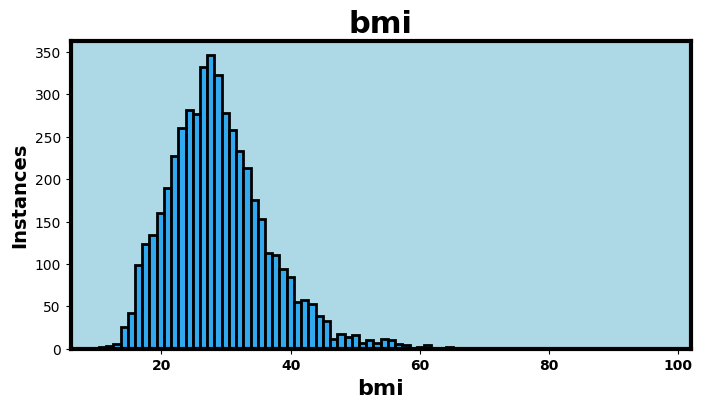

In [46]:
# Utilize function to display histogram plot
hist_plot('bmi','auto');

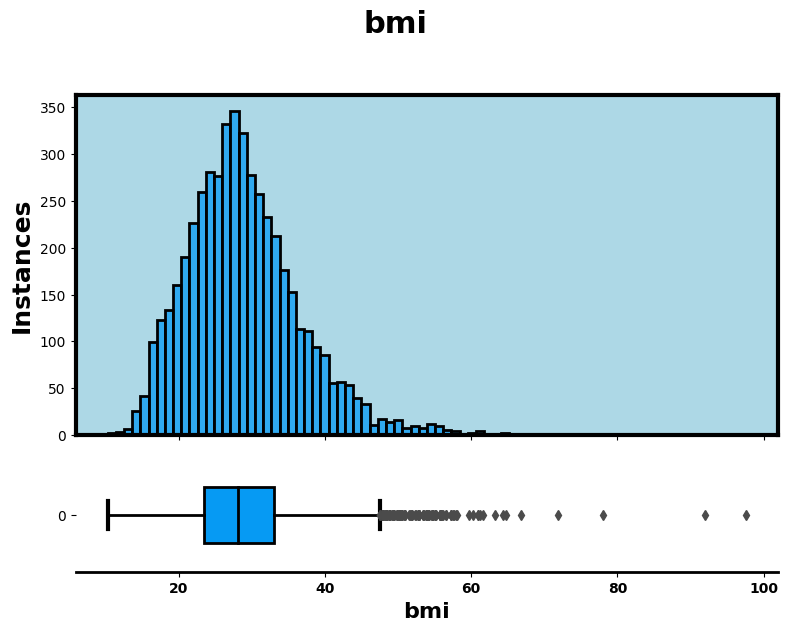

In [47]:
# Use Function to display Histogram and Boxplot
hist_box_plot('bmi','auto');

- This has a normal distribution however there are several outliers on the high side above 50.  Lets filter out the outliers.

In [48]:
#mean = np.mean(df["bmi"]) # calculate the mean
#td = np.std(df["bmi"]) # calculate the standard deviation
#std

In [49]:
#threshold = 1.6 # set the threshold
#z_score = (df["bmi"] - mean) / std # calculate the z-score
#condition = np.abs(z_score) < threshold # create a boolean condition
#df.loc[condition, "bmi"] = np.nan # update the column with NaN values for outliers
#df.dropna(inplace=True) # drop rows with NaN values in place

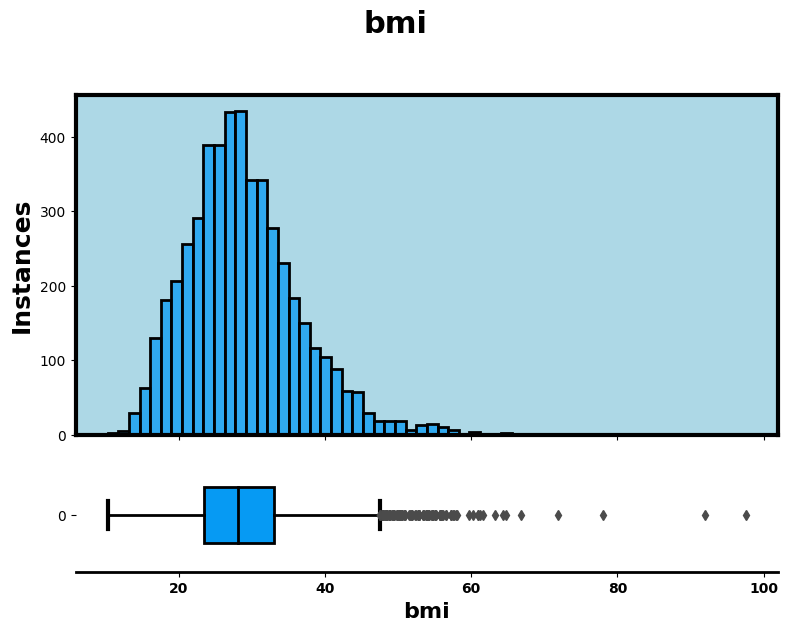

In [50]:
# Use Function to display Histogram and Boxplot
hist_box_plot('bmi', 60);

In [51]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

- BMI Outliers are all removed now.  The mean is 39 and the median is 45.

##Categorical Columns

- For each categorical column we will display the value counts, descriptive statistics, and a count plot to visualize the data.

### Summary Statistics

In [52]:
df.describe(exclude=('number'))

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


###Hypertension Column

In [53]:
# Replace names so it's easier to understand and understand graphs
df['hypertension'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [54]:
#Display the value counts for the column
df['hypertension'].value_counts()

No     4612
Yes     498
Name: hypertension, dtype: int64

In [55]:
#Display the normalized value counts for the column
df['hypertension'].value_counts(normalize = True)

No     0.902544
Yes    0.097456
Name: hypertension, dtype: float64

In [56]:
#Display the normalized value counts for the column
df['hypertension'].describe()

count     5110
unique       2
top         No
freq      4612
Name: hypertension, dtype: object

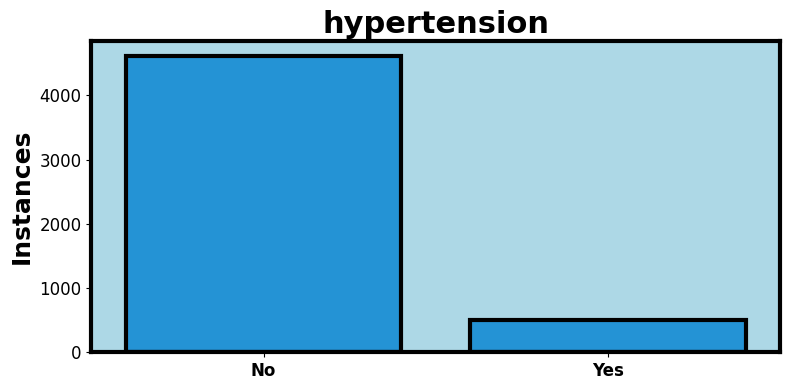

In [57]:
# Utilize function to display count plot
count_plot('hypertension', ['No', 'Yes'])

 - The majority do not have hypertension. 

### Heart Disease Column

In [58]:
# Replace names so it's easier to understand and understand graphs
df['heart_disease'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [59]:
#Display the value counts for the column
df['heart_disease'].value_counts()

No     4834
Yes     276
Name: heart_disease, dtype: int64

In [60]:
#Display the normalized value counts for the column
df['heart_disease'].value_counts(normalize = True)

No     0.945988
Yes    0.054012
Name: heart_disease, dtype: float64

 - With this being only 5%, I would remove the Yes and then it would be a single column of No values.  This column would not be a good indicator of stroke with all values being No.  I will remove the column. 

In [61]:
#Drop column
df.drop(columns = ['heart_disease'], inplace=True)

In [62]:
df.columns

Index(['gender', 'age', 'hypertension', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')

- Confirmed Heart Disease column is now dropped. 

###Gender Column

In [63]:
#Display the value counts for the column
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [64]:
#Display the normalized value counts for the column
df['gender'].value_counts(normalize = True)

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

In [65]:
#Display the descriptive statistics for the column
df['gender'].describe()

count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object

- With "Other" being only 1 value, I will remove that row.

In [66]:
#Removing all rows with Never_worked
df.drop(df[df['gender'] == 'Other'].index, inplace=True)

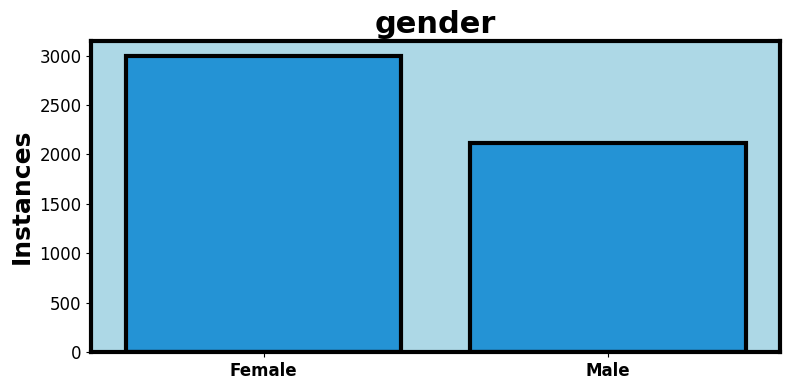

In [67]:
# Utilize function to display count plot
count_plot('gender', ['Female', 'Male'])

- The distribution is 63% female and 37% male.

### Ever Married Column

In [68]:
#Display the value counts for the column
df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [69]:
#Display the normalized value counts for the column
df['ever_married'].value_counts(normalize = True)

Yes    0.656293
No     0.343707
Name: ever_married, dtype: float64

In [70]:
#Display the descriptive statistics for the column
df['ever_married'].describe()

count     5109
unique       2
top        Yes
freq      3353
Name: ever_married, dtype: object

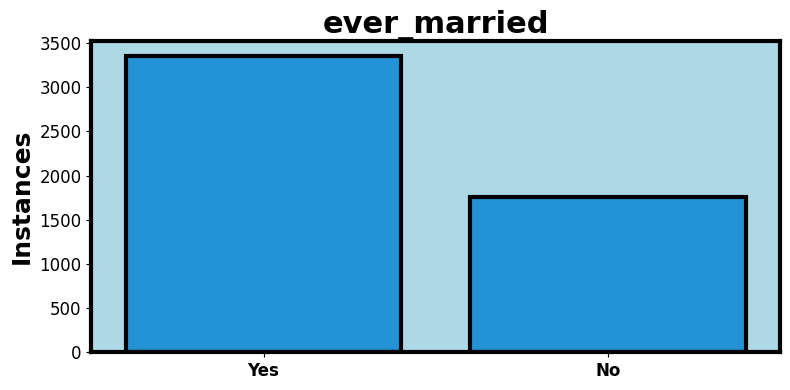

In [71]:
# Utilize function to display count plot
count_plot('ever_married', ['Yes', 'No'])

### Work Type Column

In [72]:
#Display the value counts for the column
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [73]:
#Display the normalized value counts for the column
df['work_type'].value_counts(normalize = True)

Private          0.572323
Self-employed    0.160305
children         0.134469
Govt_job         0.128597
Never_worked     0.004306
Name: work_type, dtype: float64

- With Never Worked being under 1%, we will remove that type as it will not be useful in our modeling.

In [74]:
#Removing all rows with Never_worked
df.drop(df[df['work_type'] == 'Never_worked'].index, inplace=True)

In [75]:
#Display the descriptive statistics for the column
df['work_type'].describe()

count        5087
unique          4
top       Private
freq         2924
Name: work_type, dtype: object

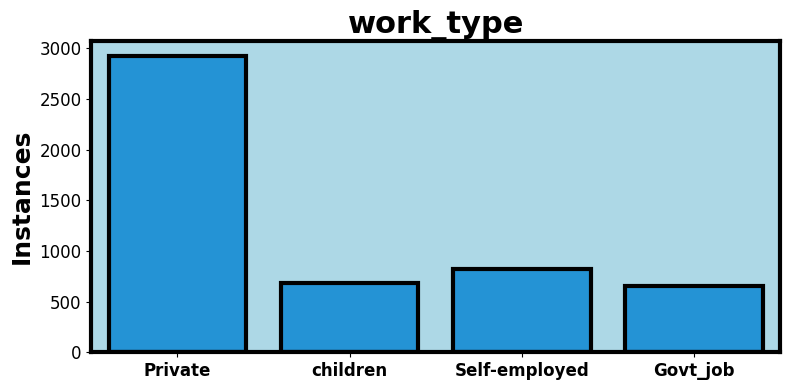

In [76]:
# Utilize function to display count plot
count_plot('work_type', ['Private', 'children', 'Self-employed', 'Govt_job'])

 - The majority of people have a Private work type followed by self-employed.

### Residence Type Column

In [77]:
#Display the value counts for the column
df['Residence_type'].value_counts()

Urban    2581
Rural    2506
Name: Residence_type, dtype: int64

In [78]:
#Display the normalized value counts for the column
df['Residence_type'].value_counts(normalize = True)

Urban    0.507372
Rural    0.492628
Name: Residence_type, dtype: float64

In [79]:
#Display the descriptive statistics for the column
df['Residence_type'].describe()

count      5087
unique        2
top       Urban
freq       2581
Name: Residence_type, dtype: object

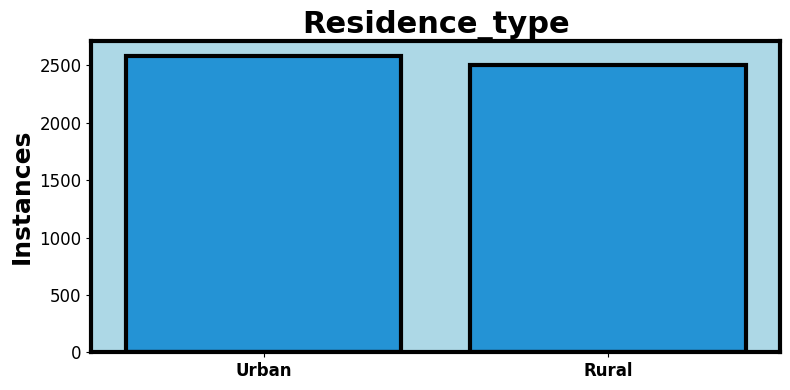

In [80]:
# Utilize function to display count plot
count_plot('Residence_type', ['Urban', 'Rural'])

- These are distributed fairly evenly with Urban being slightly higher.

### Smoking Status Column

In [81]:
#Display the value counts for the column
df['smoking_status'].value_counts()

never smoked       1878
Unknown            1536
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [82]:
#Display the normalized value counts for the column
df['smoking_status'].value_counts(normalize = True)

never smoked       0.369176
Unknown            0.301946
formerly smoked    0.173776
smokes             0.155101
Name: smoking_status, dtype: float64

In [83]:
#Display the descriptive statistics for the column
df['smoking_status'].describe()

count             5087
unique               4
top       never smoked
freq              1878
Name: smoking_status, dtype: object

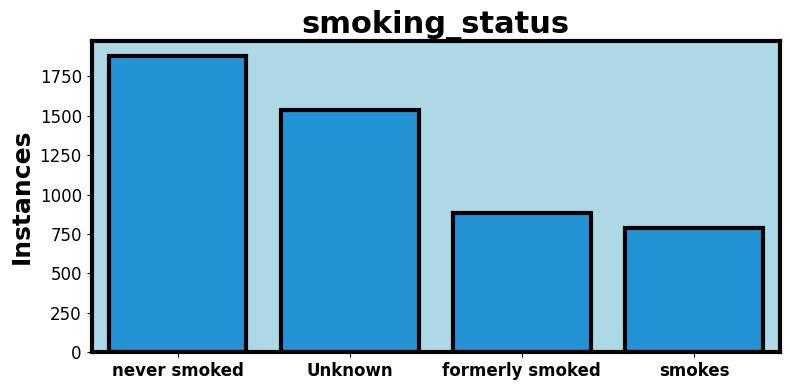

In [84]:
# Utilize f'unction to display count plot
count_plot('smoking_status', ['never smoked', 'Unknown', 'formerly smoked','smokes'])

- Never smoked and unknown are about the same followed by formerly smoked. 

### Stroke Column

In [85]:
# Replace names so it's easier to understand and understand graphs
df['stroke'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [86]:
#Display the value counts for the column
df['stroke'].value_counts()

No     4838
Yes     249
Name: stroke, dtype: int64

In [87]:
#Display the normalized value counts for the column
df['stroke'].value_counts(normalize = True)

No     0.951052
Yes    0.048948
Name: stroke, dtype: float64

In [88]:
#Display the descriptive statistics for the column
df['stroke'].describe()

count     5087
unique       2
top         No
freq      4838
Name: stroke, dtype: object

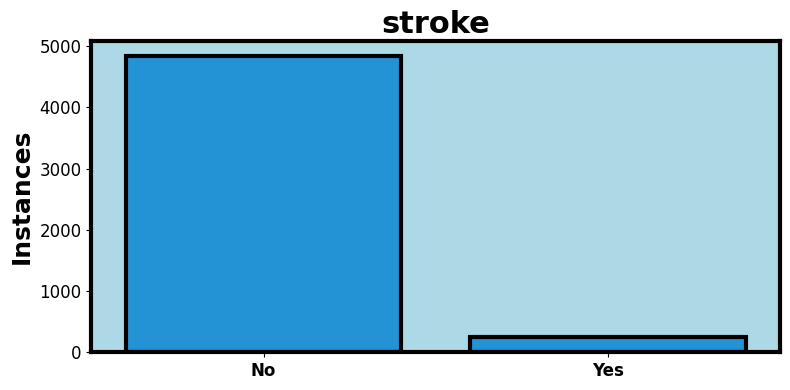

In [89]:
# Utilize function to display count plot
count_plot('stroke', ['No', 'Yes'])

- We can see this is a very unbalanced dataset with less than 1% having a stroke. 

# Explanatory Data Analysis

## Correlation Heatmap 

In [90]:
# Define a dictionary with key/value pairs and use it to replace values
dict = {"No": 0, "Yes": 1}
df.replace({'stroke': dict}, inplace = True)
df.replace({'hypertension': dict}, inplace=True)
df.replace({'ever_married': dict}, inplace=True)

In [91]:
df.dtypes

gender                object
age                  float64
hypertension           int64
ever_married           int64
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<ipython-input-92-c915e2bb1d48>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


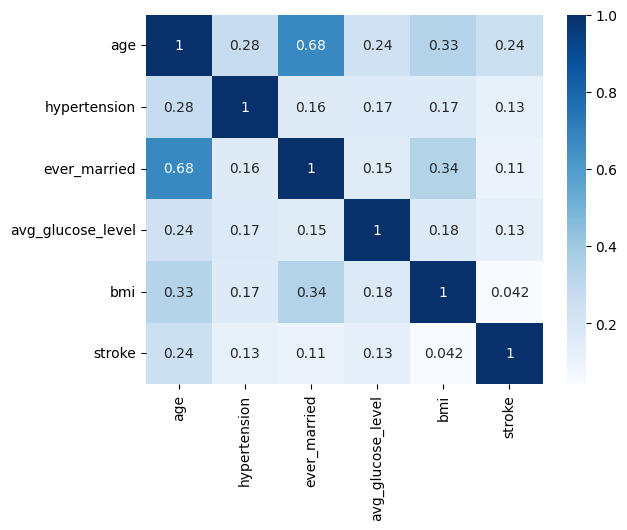

In [92]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True) ;

- Age has the highest correlation to Stroke.

## Bar Plots for Numerical Columns

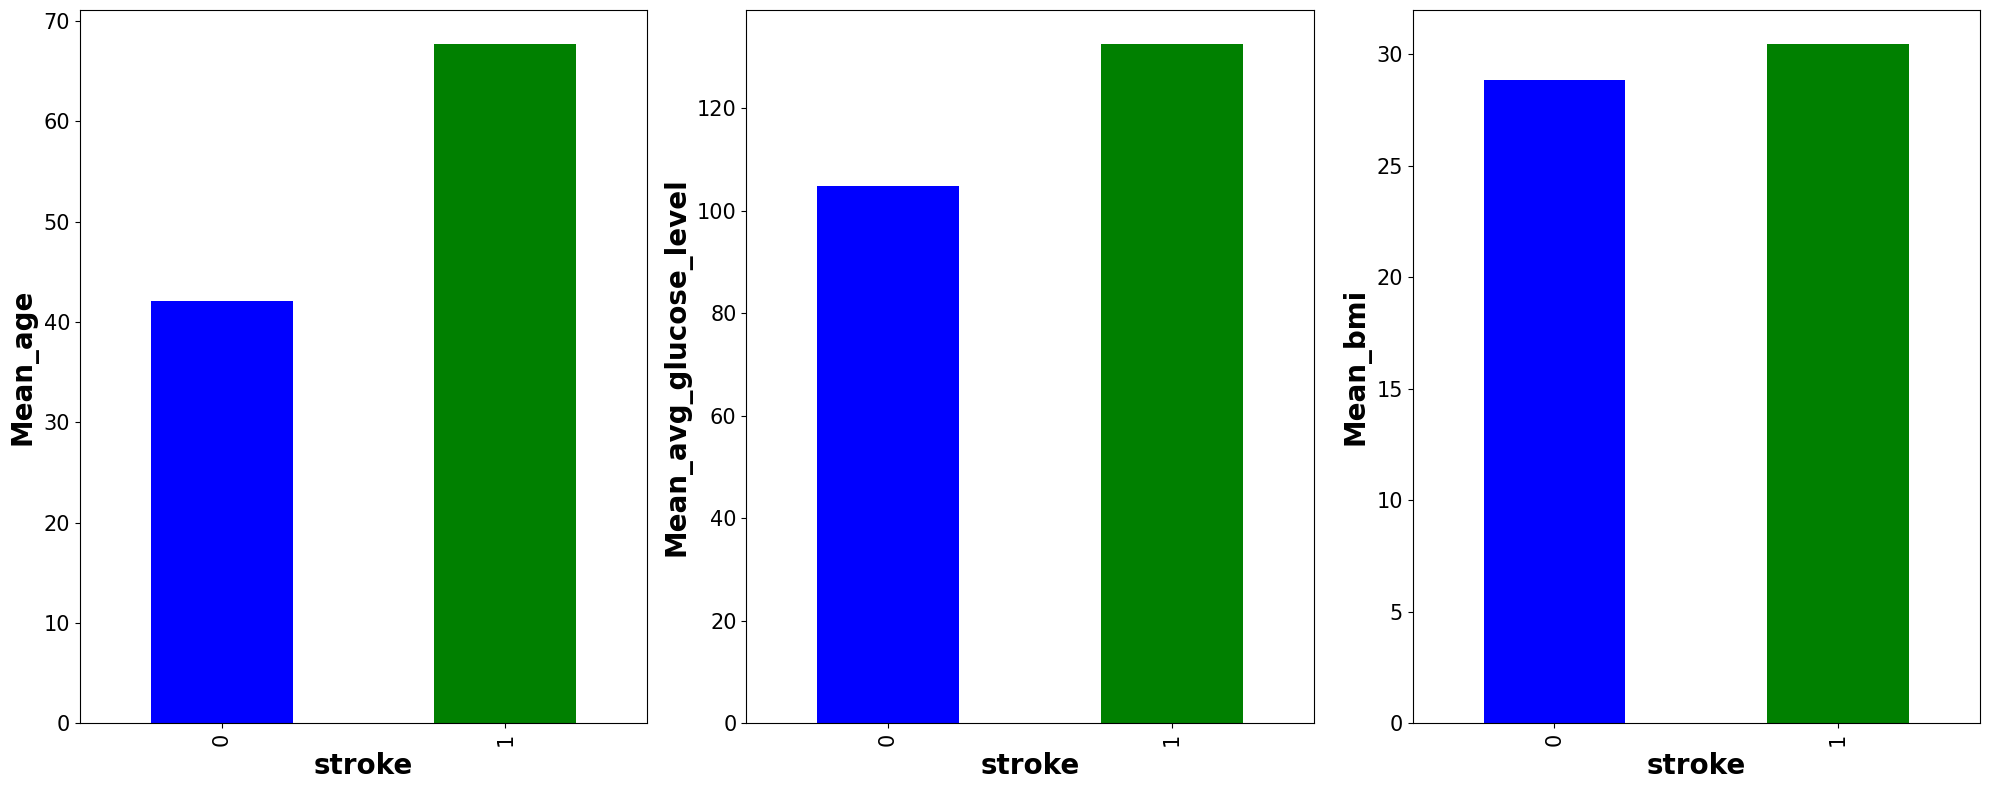

In [93]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 8))
for i, c in enumerate(['age', 'avg_glucose_level', 'bmi']):
    df.groupby('stroke')[c].mean().plot(kind='bar', ax=axes[i], color=('blue', 'green'))
    axes[i].set_ylabel(f'Mean_{c}', fontsize=20, fontweight='bold')
    axes[i].set_xlabel('stroke', fontsize=20, fontweight='bold')
    axes[i].tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

- Higher age does correlate with having a stroke.  It does not appear that Average Gluclose Level or BMI are correlated with stroke. 

## Scatter Plot

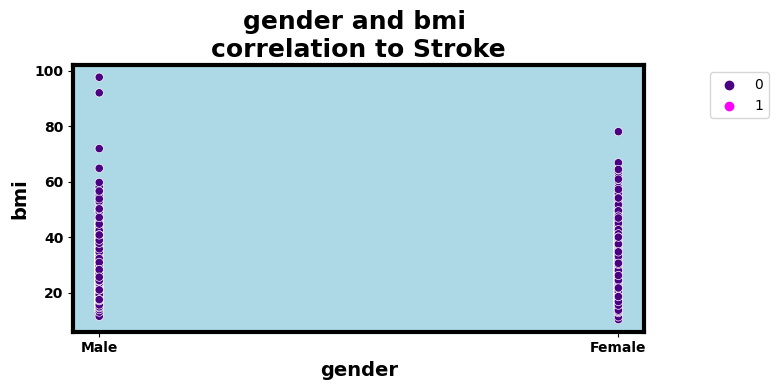

In [94]:
scatter_plot('gender', 'bmi')

## Histogram

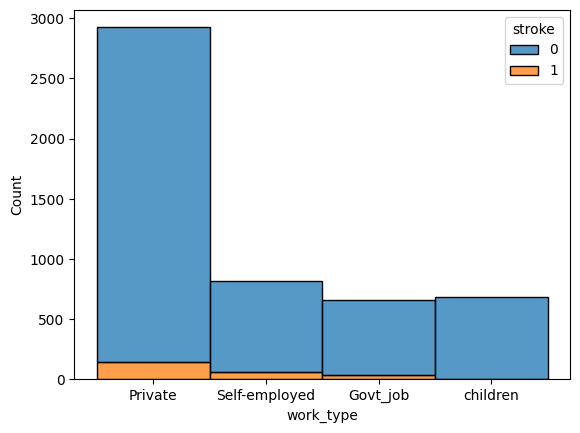

In [95]:
sns.histplot(data=df, x="work_type", hue="stroke", multiple="stack")
plt.show()

- The individuals who have Private work type have the most incidence of stroke.